In [1]:
import os
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import tqdm
import utils
from featurizer import calc_spectrogram
from IPython.display import Audio

start = 154
dur = 5
track = "F:/CMP 2020/GP/Datasets/musdb18/test/AM Contra - Heart Peripheral"

mix, rate = utils.audio_loader(track+"/mixture.wav", start=start, dur=dur)
vocals, rate = utils.audio_loader(track+"/vocals.wav", start=start, dur=dur)
drums, rate = utils.audio_loader(track+"/drums.wav", start=start, dur=dur)
bass, rate = utils.audio_loader(track+"/bass.wav", start=start, dur=dur)
other, rate = utils.audio_loader(track+"/other.wav", start=start, dur=dur)

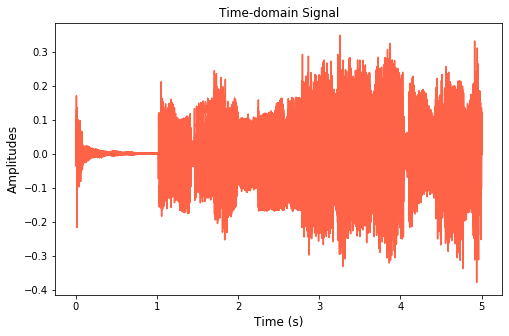

In [2]:
utils.plot_signal(mix)

Targets:   0%|                                                            | 0/1 [00:00<?, ?it/s]

> f:\cmp 2020\gp\src\model.py(153)forward()
-> pretty_spectrogram(tmp, gray=True)
(Pdb) c


Targets: 100%|████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.54s/it]


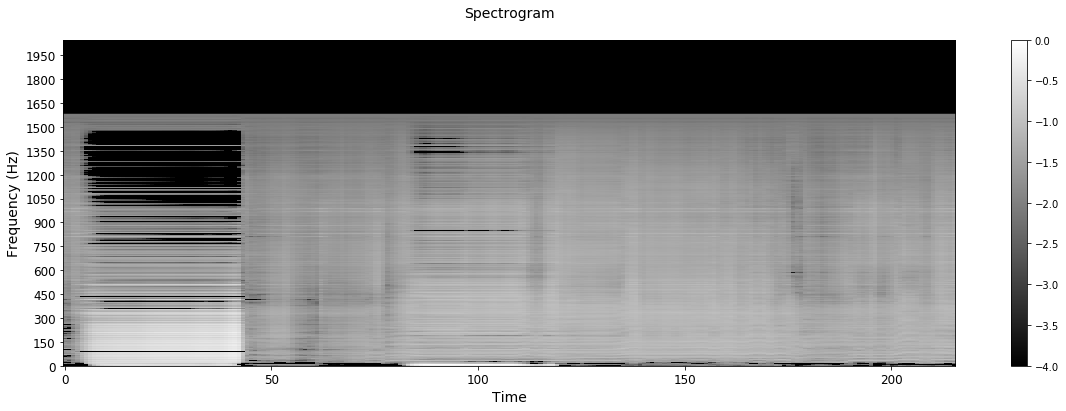

In [26]:
from separate import separate

estimates = separate(audio=mix.T, targets=['vocals'], niter=1, 
                    models_path="F:/CMP 2020/GP/src/models", model_name="try5")

estimate = estimates['vocals'].T
display(Audio(estimate[0], rate=rate))

# Audio

In [27]:
display(Audio(mix[0], rate=rate))
display(Audio(vocals[0], rate=rate))
display(Audio(drums[0], rate=rate))
display(Audio(bass[0], rate=rate))
display(Audio(other[0], rate=rate))

# Frequency

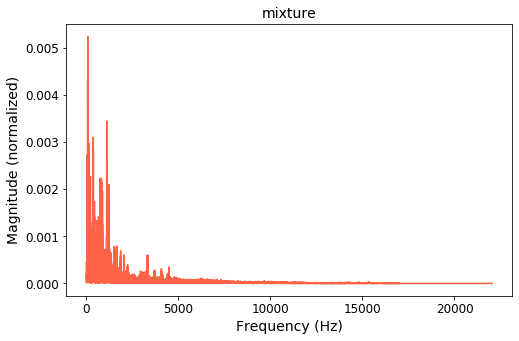

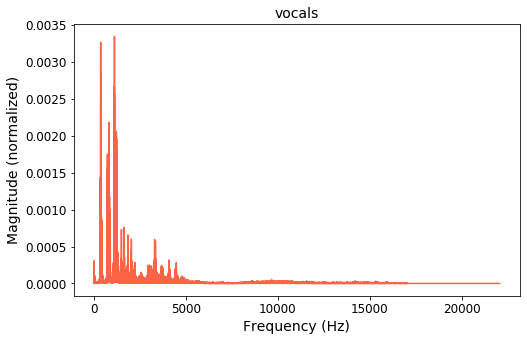

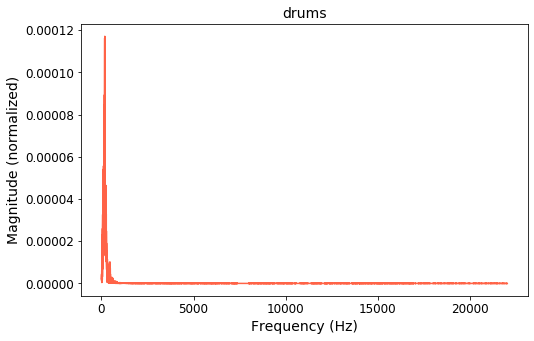

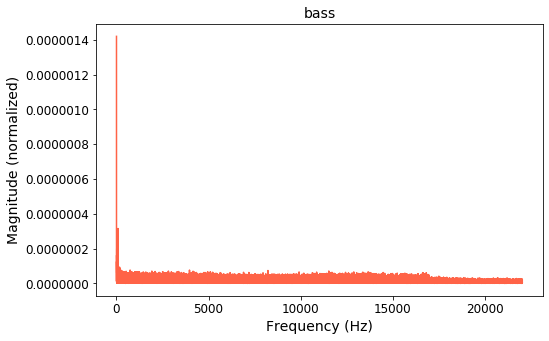

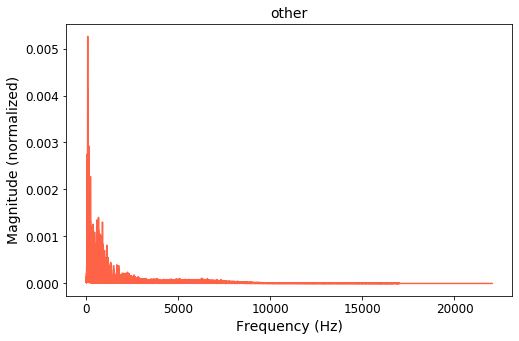

In [4]:
utils.calc_fft(mix[0], rate, 'mixture')
utils.calc_fft(vocals[0], rate, title='vocals')
utils.calc_fft(drums[0], rate, title='drums')
utils.calc_fft(bass[0], rate, title='bass')
utils.calc_fft(other[0], rate, title='other')

# Spectrogram

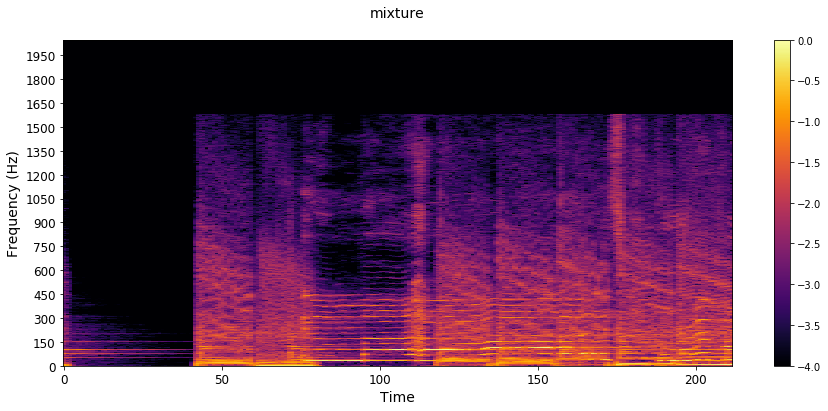

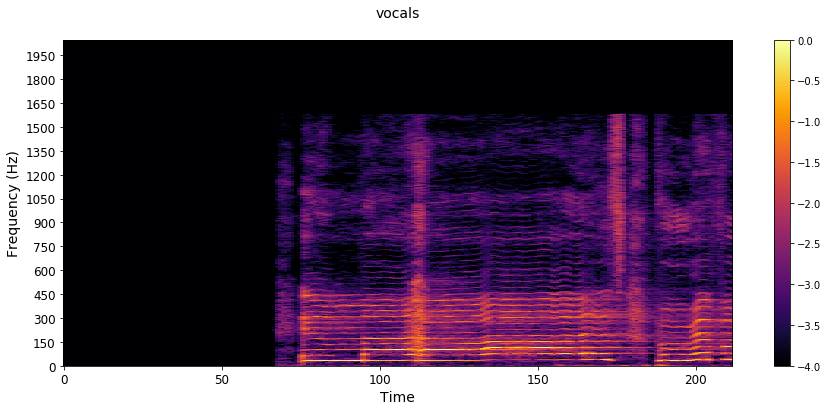

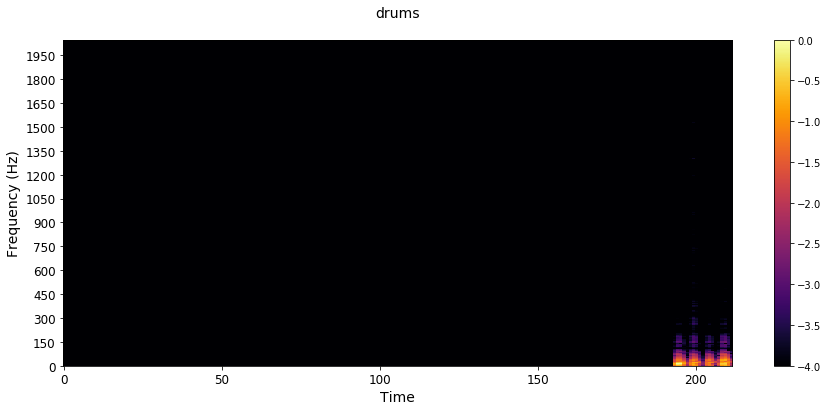

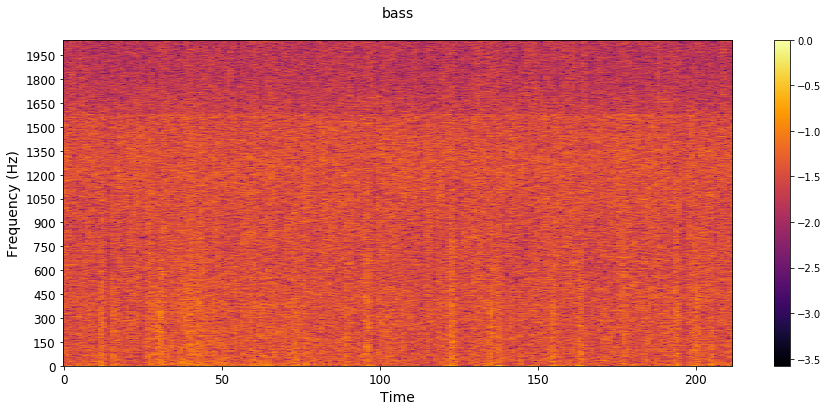

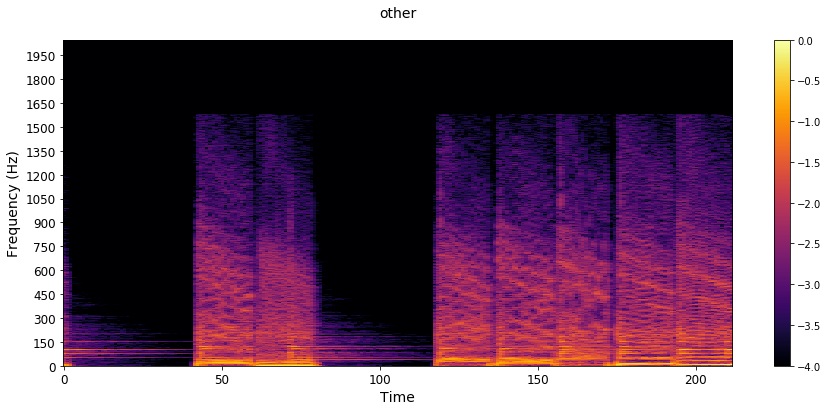

In [5]:
utils.pretty_spectrogram(calc_spectrogram(mix), title='mixture')
utils.pretty_spectrogram(calc_spectrogram(vocals), title='vocals')
utils.pretty_spectrogram(calc_spectrogram(drums), title='drums')
utils.pretty_spectrogram(calc_spectrogram(bass), title='bass')
utils.pretty_spectrogram(calc_spectrogram(other), title='other')

In [ ]:
z = mix.shape[1] - estimates['vocals'].T.shape[1]
zero = np.zeros((mix.shape[0], z))
estimate = np.append(estimates['vocals'].T, zero, axis=1)

# mask = estimate / mix

utils.pretty_spectrogram(calc_spectrogram(estimate), title='vocals')